In [73]:
import pandas as pd

In [74]:
df = pd.read_excel(r'Data_Train.xlsx')
# r will be used if there are multiple sheets present in same excel file at that time only sheet name is inuff.In this case there
#is only one sheet.

In [75]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [76]:
#lenght of the dataset
len(df)

10683

In [77]:
#total number of nan values present in each column
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [78]:
#price is our dependent features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [79]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 25m      1
35h 35m      1
32h 20m      1
40h 20m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [80]:
#since dataset contain only two nan values so we can drop those two rows
df = df.dropna()

In [81]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [82]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## EDA (Exploratory Data Analysis)

In [156]:
#Separating Date Year And Month 
df["Journey_day"] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

KeyError: 'Date_of_Journey'

In [84]:
df.drop(["Date_of_Journey"],inplace=True,axis=1)

In [85]:
#Extracting hours minutes from the departure time
df["Dep_hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [86]:
df.drop(['Dep_Time'],inplace=True,axis=1)

In [87]:
#Extracting hours minutes from the arrival time
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [88]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [89]:
#Duration should be divided into two columns of hours and minutes
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_min = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))
    

In [90]:
df["Duration_hours"] = duration_hours
df["Duration_minutes"] = duration_min

In [91]:
df.drop(["Duration"],inplace=True,axis=1)

In [92]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [93]:
#Converting total stops into numerical value with an addition of Stops col.
stops = list(df['Total_Stops'])

for i in range(len(stops)):
    if len(stops[i].split()) != 2:
        stops[i] = stops[i].split(sep='-')
    else:
        stops[i] = stops[i].split()


In [94]:
Number_stops = []

for i in range(len(stops)):
    if(stops[i][0] == 'non'):
        Number_stops.append(int("0"))
    else:
        Number_stops.append(int(stops[i][0]))

In [95]:
df["Stops"] = Number_stops

In [96]:
df.drop(['Total_Stops'],inplace=True,axis=1)

In [97]:
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,21,35,4,45,1


## Handling Categorical Data By performing One-hot encoding because our data is a Nominal Data i.e data are present in order

In [98]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

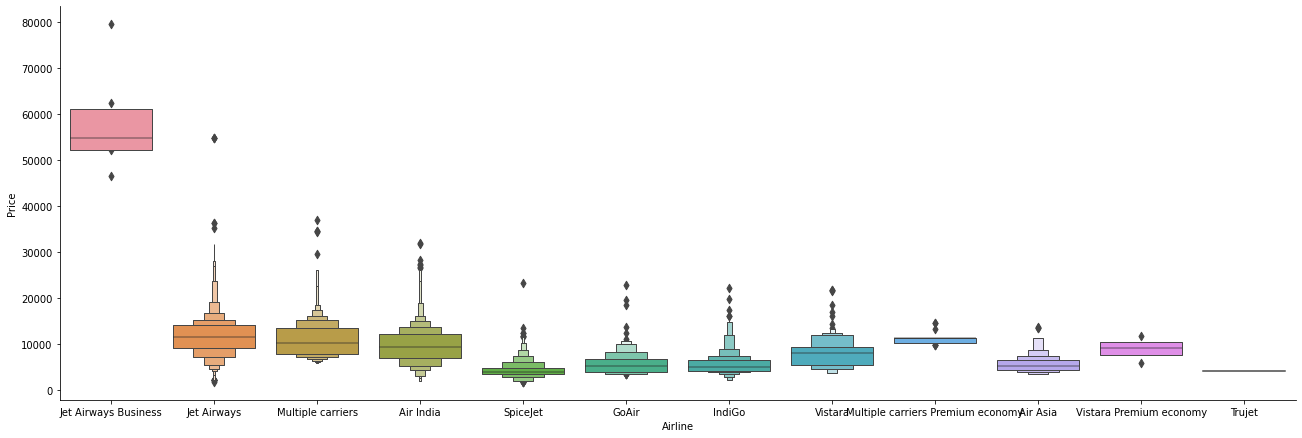

In [100]:
sns.catplot(x="Airline",y="Price",data = df.sort_values("Price",ascending=False),height=6,aspect=3,kind="boxen")

In [101]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [102]:

Airline = pd.get_dummies(df["Airline"],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [103]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

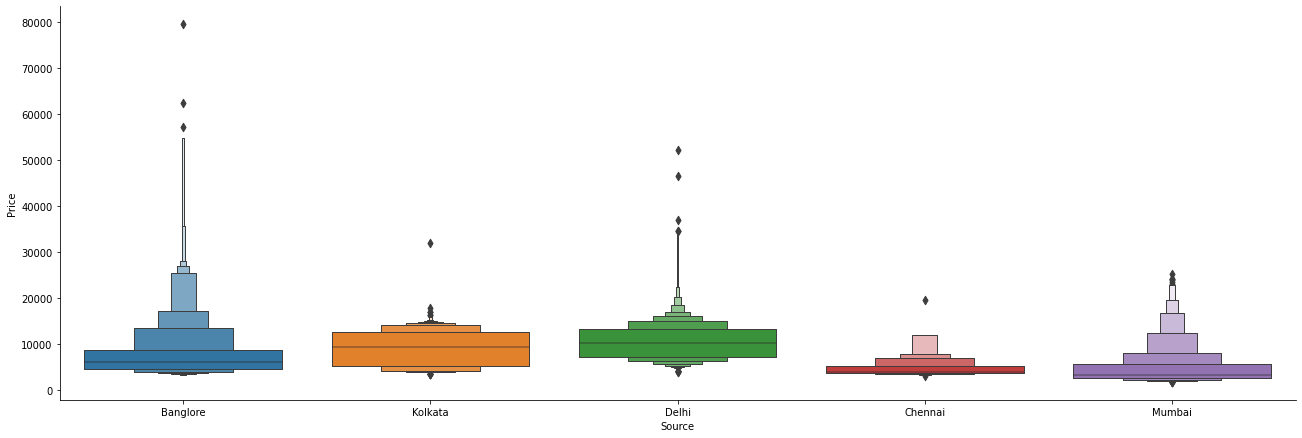

In [104]:
sns.catplot(x="Source",y="Price",data=df,height=6,kind="boxen",aspect=3)
plt.show()

In [105]:
Source = df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


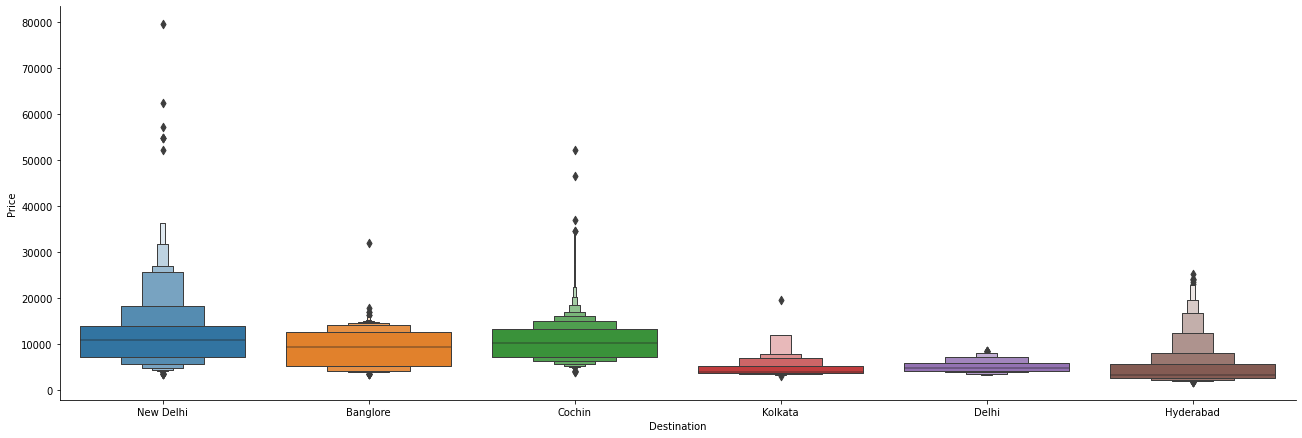

In [106]:
sns.catplot(x="Destination",y="Price",data=df,height=6,kind="boxen",aspect=3)
plt.show()

In [107]:
destination = df[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [108]:
#since route is same as number of stops and additional info contains more than 80% of 'no-info' so drop these two col
df.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [109]:
#Concatenate all dataframes
df_train = pd.concat([df,Airline,Source,destination],axis=1)

In [110]:
df_train.head()

,Airline,Source,Destination,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [111]:
df_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [112]:
df_train.head()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Stops,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,2,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,...,0,0,0,0,0,0,0,0,0,1


In [113]:
df_train.shape

(10682, 30)

In [114]:
df.shape

(10682, 13)

## Test Dataset

In [42]:
df_test = pd.read_excel(r"Test_set.xlsx")

In [43]:
df_test.shape

(2671, 10)

In [44]:
#Performing EDA techniques
#Separating Date Year And Month 
df_test["Journey_day"] = pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [45]:
#Extracting hours minutes from the departure time
df_test["Dep_hour"] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [46]:
df_test.drop(['Dep_Time'],inplace=True,axis=1)

In [47]:
#Extracting hours minutes from the arrival time
df_test["Arrival_hour"] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test.drop(["Arrival_Time"],axis=1,inplace=True)

In [48]:
#Duration should be divided into two columns of hours and minutes
duration_test = list(df_test["Duration"])

for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'
        else:
            duration_test[i] = "0h " + duration_test[i]
            
duration_test_hours = []
duration_test_min = []

for i in range(len(duration_test)):
    duration_test_hours.append(int(duration_test[i].split(sep='h')[0]))
    duration_test_min.append(int(duration_test[i].split(sep='m')[0].split()[-1]))
    

In [49]:
df_test["Duration_test_hours"] = duration_test_hours
df_test["Duration_test_minutes"] = duration_test_min

In [50]:
df_test.drop(["Duration"],inplace=True,axis=1)

In [51]:
#Converting total stops into numerical value with an addition of Stops col.
stops_test = list(df_test['Total_Stops'])

for i in range(len(stops_test)):
    if len(stops_test[i].split()) != 2:
        stops_test[i] = stops_test[i].split(sep='-')
    else:
        stops_test[i] = stops_test[i].split()

In [52]:
Number_stops_test = []

for i in range(len(stops_test)):
    if(stops_test[i][0] == 'non'):
        Number_stops_test.append(int("0"))
    else:
        Number_stops_test.append(int(stops_test[i][0]))


In [53]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_test_hours,Duration_test_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [54]:
df_test.drop(['Total_Stops'],inplace=True,axis=1)

In [55]:
Airline_test = pd.get_dummies(df_test["Airline"],drop_first=True)
source_test = df_test['Source']
source_test = pd.get_dummies(source_test,drop_first=True)
destination_test = df_test['Destination']
destination_test = pd.get_dummies(destination_test,drop_first=True)

In [56]:
#since route is same as number of stops and additional info contains more than 80% of 'no-info' so drop these two col
df_test.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [57]:
#Concatenate all dataframes
df_test = pd.concat([df_test,Airline_test,source_test,destination_test],axis=1)

In [58]:
df_test.drop(['Airline','Date_of_Journey','Source','Destination'],inplace=True,axis=1)

In [59]:
df_test.head()

,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_test_hours,Duration_test_minutes,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6,6,17,30,4,25,10,55,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,10,20,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,0,23,45,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,21,0,13,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2,50,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
df_test['Stops'] = Number_stops_test

In [61]:
df_test.head()

,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_test_hours,Duration_test_minutes,Air India,GoAir,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Stops
0,6,6,17,30,4,25,10,55,0,0,...,0,1,0,0,1,0,0,0,0,1
1,12,5,6,20,10,20,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,21,5,19,15,19,0,23,45,0,0,...,0,1,0,0,1,0,0,0,0,1
3,21,5,8,0,21,0,13,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,24,6,23,55,2,45,2,50,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature Engineering

In [115]:
df_train.shape

(10682, 30)

In [116]:
X = df_train.loc[:,['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes',
       'Stops', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [117]:
X.shape

(10682, 29)

In [120]:
y = df_train.iloc[:,0]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

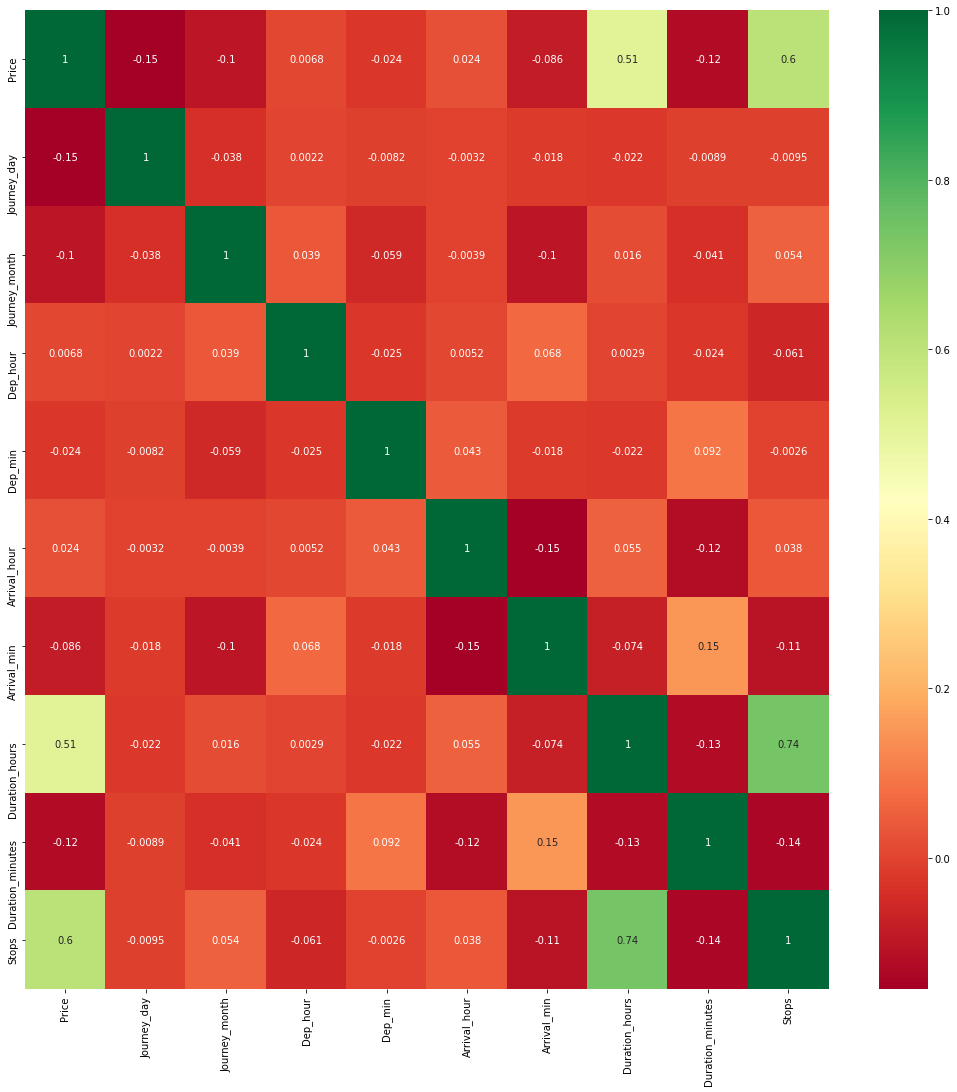

In [121]:
#Performing correlation. Correlation will tell us the relation between dependent and independent features
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot = True,cmap="RdYlGn")
plt.show()

In [122]:
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [123]:
print(selection.feature_importances_)

[1.42938647e-01 5.33787265e-02 2.39367144e-02 2.16627322e-02
 2.86384375e-02 1.96152503e-02 1.13943862e-01 1.71711624e-02
 2.26997308e-01 9.38323370e-03 1.80385325e-03 1.98173232e-02
 1.43841775e-01 6.76252853e-02 1.79014956e-02 8.31824119e-04
 3.28475821e-03 1.15281427e-04 4.84061876e-03 7.57244615e-05
 4.19957212e-04 9.67402338e-03 3.43587584e-03 6.91579532e-03
 1.05646688e-02 1.84025538e-02 7.30607962e-03 5.74343126e-04
 2.49026885e-02]


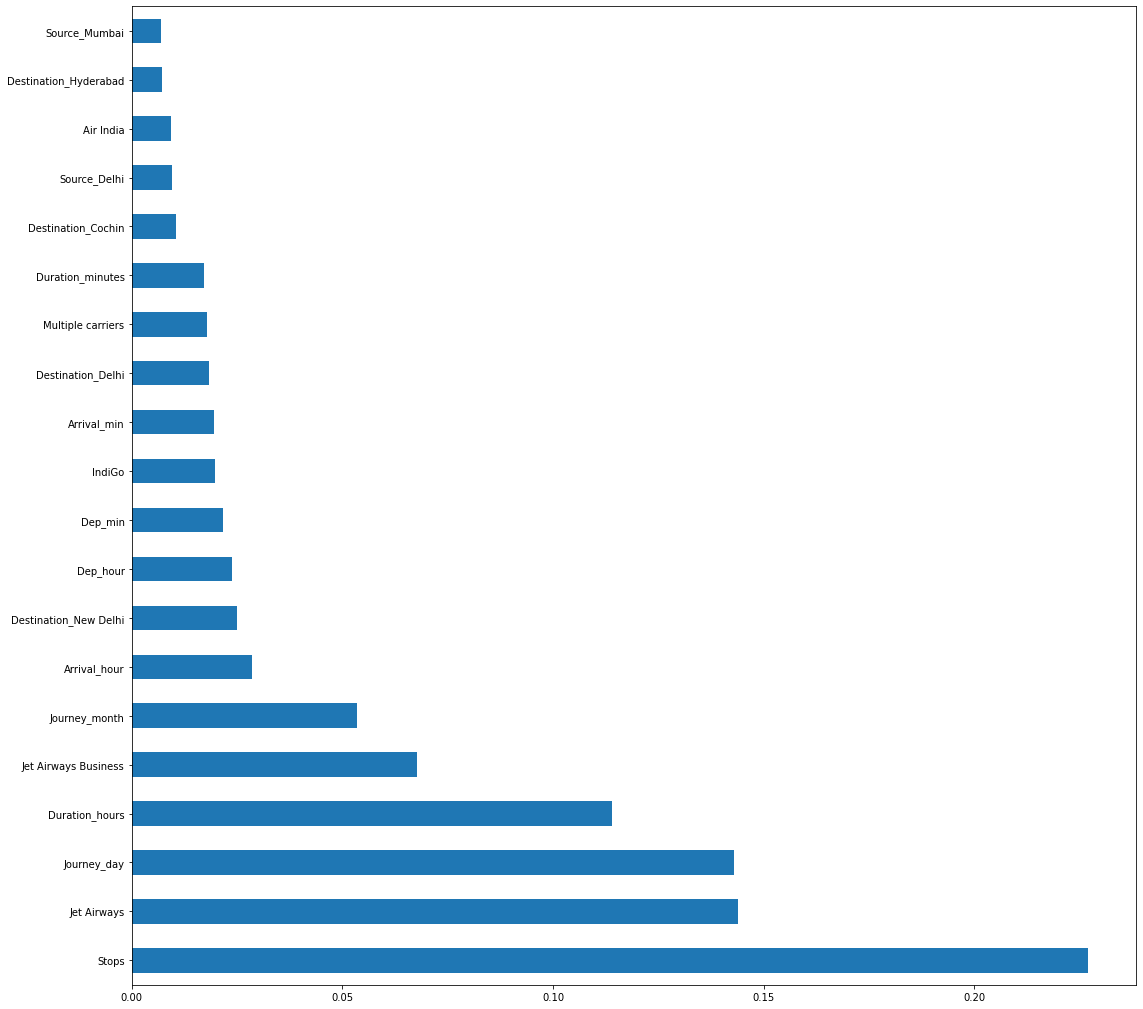

In [130]:
#plot graph of feature importance
plt.figure(figsize=(18,18))
feat_imp = pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind="barh")
plt.show()

## Fitting Model Using Random Forest
### ->Splitting dataset using train_test_split
### ->Prediction with test_data
### ->Check RMSE Score in case of Regression
### -> Plot graph

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [134]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [135]:
y_pred = reg.predict(X_test)

In [137]:
reg.score(X_train,y_train)

0.9539316911292102

In [138]:
reg.score(X_test,y_test)

0.8076863094523868

C:\Users\91942\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


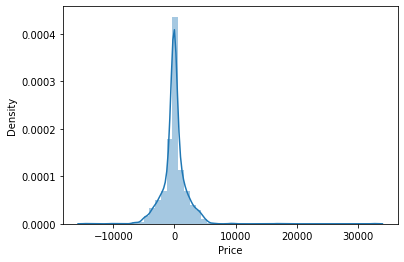

In [140]:
sns.distplot(y_test-y_pred)
plt.show()
#After plotting graph it follows gaussian distrbution according which model is performing well

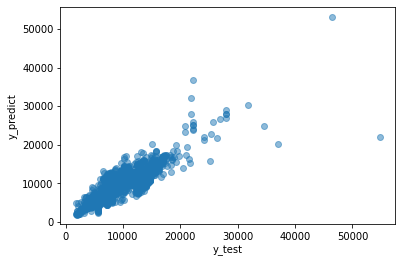

In [141]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

In [148]:
from sklearn.metrics import mean_squared_error,confusion_matrix,mean_absolute_error,r2_score
import numpy as np
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score",r2_score(y_test,y_pred))

MSE 3944486.5682680747
MAE 1210.2017800206995
RMSE 1986.073152798777
R2_score 0.8076863094523868


In [149]:
#Hyperparameter tuning can be perform as well in this case the RMSE is not changing much that's why I didn't perform
#Saving the model using pickle
import pickle
file = open("flight_randfor.pkl",'wb')
pickle.dump(reg,file)

In [150]:
model = open("flight_randfor.pkl",'rb')
forest = pickle.load(model)

In [151]:
y_prediction = forest.predict(X_test)

In [152]:
r2_score(y_test,y_prediction)

0.8076863094523868

2137